# OpenIntro Lab - Introduction to data #

This notebook is one of the first steps in the process is to summarize and describe the raw information - the data. It is part of the first set of **OpenIntro** labs, that are part of the study of the book: **Introductory Statistics with Randomization and Simulation**. Lab avaliable from: [Introducton to Data](https://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/intro_to_data/intro_to_data.html)

We will use a data set collected by the **Centers for Disease Control and Prevention** (CDC), called **The Behavioral Risk Factor Surveillance System** (BRFSS). Avaliable from: [BRFSS](http://www.cdc.gov/brfss).

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

In [0]:
source("http://www.openintro.org/stat/data/cdc.R")

### **Exercise 1** ### 
How many cases are there in this data set? How many variables? For each variable, identify its data type (e.g. categorical, discrete).

In [0]:
names(cdc) 

[1] "genhlth"  "exerany"  "hlthplan" "smoke100" "height"   "weight"   "wtdesire"
[8] "age"      "gender"

In [31]:
class(cdc$genhlth)
class(cdc$exerany)
class(cdc$weight)

[1] "factor"

[1] "numeric"

[1] "integer"

In [3]:
head(cdc)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
1,good,0,1,0,70,175,175,77,m
2,good,0,1,1,64,125,115,33,f
3,good,1,1,1,60,105,105,49,f
4,good,1,1,0,66,132,124,42,f
5,very good,0,1,0,61,150,130,55,f
6,very good,1,1,0,64,114,114,55,f


In [4]:
tail(cdc) # 20000 cases

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
19995,good,0,1,1,69,224,224,73,m
19996,good,1,1,0,66,215,140,23,f
19997,excellent,0,1,0,73,200,185,35,m
19998,poor,0,1,0,65,216,150,57,f
19999,good,1,1,0,67,165,165,81,f
20000,good,1,1,1,69,170,165,83,m


General data summary.

In [33]:
str(cdc)

'data.frame':	20000 obs. of  9 variables:
 $ genhlth : Factor w/ 5 levels "excellent","very good",..: 3 3 3 3 2 2 2 2 3 3 ...
 $ exerany : num  0 0 1 1 0 1 1 0 0 1 ...
 $ hlthplan: num  1 1 1 1 1 1 1 1 1 1 ...
 $ smoke100: num  0 1 1 0 0 0 0 0 1 0 ...
 $ height  : num  70 64 60 66 61 64 71 67 65 70 ...
 $ weight  : int  175 125 105 132 150 114 194 170 150 180 ...
 $ wtdesire: int  175 115 105 124 130 114 185 160 130 170 ...
 $ age     : int  77 33 49 42 55 55 31 45 27 44 ...
 $ gender  : Factor w/ 2 levels "m","f": 1 2 2 2 2 2 1 1 2 1 ...


In [34]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [35]:
glimpse(cdc)

Rows: 20,000
Columns: 9
$ genhlth  <fct> good, good, good, good, very good, very good, very good, ver…
$ exerany  <dbl> 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, …
$ hlthplan <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, …
$ smoke100 <dbl> 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, …
$ height   <dbl> 70, 64, 60, 66, 61, 64, 71, 67, 65, 70, 69, 69, 66, 70, 69, …
$ weight   <int> 175, 125, 105, 132, 150, 114, 194, 170, 150, 180, 186, 168, …
$ wtdesire <int> 175, 115, 105, 124, 130, 114, 185, 160, 130, 170, 175, 148, …
$ age      <int> 77, 33, 49, 42, 55, 55, 31, 45, 27, 44, 46, 62, 21, 69, 23, …
$ gender   <fct> m, f, f, f, f, f, m, m, f, m, m, m, m, m, m, m, m, m, m, f, …


**Answer**: 
There are 20000 cases and 9 variables in this dataset.


In [6]:
summary(cdc)

      genhlth        exerany          hlthplan         smoke100     
 excellent:4657   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 very good:6972   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 good     :5675   Median :1.0000   Median :1.0000   Median :0.0000  
 fair     :2019   Mean   :0.7457   Mean   :0.8738   Mean   :0.4721  
 poor     : 677   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
                  Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     height          weight         wtdesire          age        gender   
 Min.   :48.00   Min.   : 68.0   Min.   : 68.0   Min.   :18.00   m: 9569  
 1st Qu.:64.00   1st Qu.:140.0   1st Qu.:130.0   1st Qu.:31.00   f:10431  
 Median :67.00   Median :165.0   Median :150.0   Median :43.00            
 Mean   :67.18   Mean   :169.7   Mean   :155.1   Mean   :45.07            
 3rd Qu.:70.00   3rd Qu.:190.0   3rd Qu.:175.0   3rd Qu.:57.00            
 Max.   :93.00   Max.   :500.0   Max.   :680.0   Max.   :99.00     

Summary of a specific variable:

In [5]:
summary(cdc$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   68.0   140.0   165.0   169.7   190.0   500.0 

In [7]:
# interquartile range = 3rd Qu - 1st Qu
IQR_weight <- (190-140)
IQR_weight

[1] 50

Some bulitin functions to explore tha data:

In [9]:
mean(cdc$weight) 
median(cdc$weight)
var(cdc$weight)

[1] 169.683

[1] 165

[1] 1606.484

Number of people who have smoked 100 cigarettes in their lifetime,  **smoke100** variable.

In [11]:
table(cdc$smoke100)


    0     1 
10559  9441 

Relative frequency distribution of people who have smoked 100 cigarettes in their lifetime, **smoke100** variable

In [12]:
table(cdc$smoke100)/20000


      0       1 
0.52795 0.47205 

Criating a bar plot from **smoke100** variable:

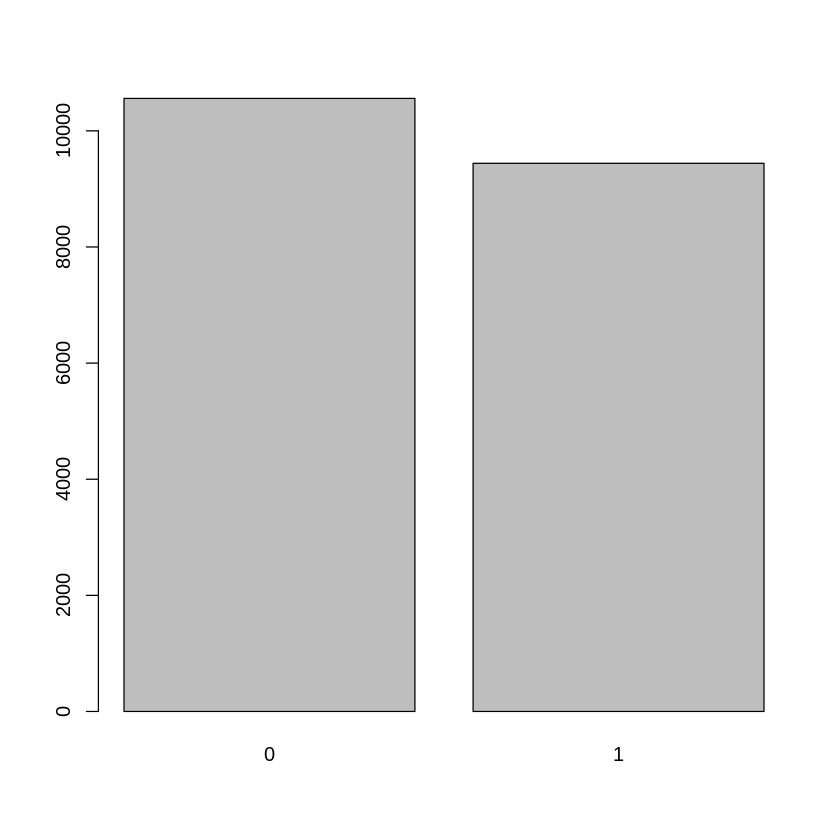

In [13]:
smoke <- table(cdc$smoke100)

barplot(smoke)

### **Exercise 2** ### 
Create a numerical summary for `height` and `age`, and compute the interquartile range for each. Compute the relative frequency distribution for `gender` and `exerany`. How many males are in the sample? What proportion of the sample reports being in excellent health?

In [22]:
summary(cdc$height)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.00   64.00   67.00   67.18   70.00   93.00 

In [19]:
# interquartile range = 3rd Qu - 1st Qu
IQR_height <- (70-64)
IQR_height

[1] 6

In [23]:
summary(cdc$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   31.00   43.00   45.07   57.00   99.00 

In [21]:
# interquartile range = 3rd Qu - 1st Qu
IQR_age <- (57-31)
IQR_age

[1] 26

In [26]:
table(cdc$gender)


    m     f 
 9569 10431 

**Answer**: There are 9569 males.

In [24]:
table(cdc$gender)/20000


      m       f 
0.47845 0.52155 

In [25]:
table(cdc$exerany)/20000


     0      1 
0.2543 0.7457 

In [28]:
summary(cdc$genhlth) / 20000

excellent very good      good      fair      poor 
  0.23285   0.34860   0.28375   0.10095   0.03385

**Answer**: the proportion of the sample reports being in excellent health = 0.23285 or 23%.



### **Exercise 3** ### 
What does the mosaic plot reveal about smoking habits and gender?

In [15]:
gender_smoke <- table(cdc$gender,cdc$smoke100)
gender_smoke

   
       0    1
  m 4547 5022
  f 6012 4419

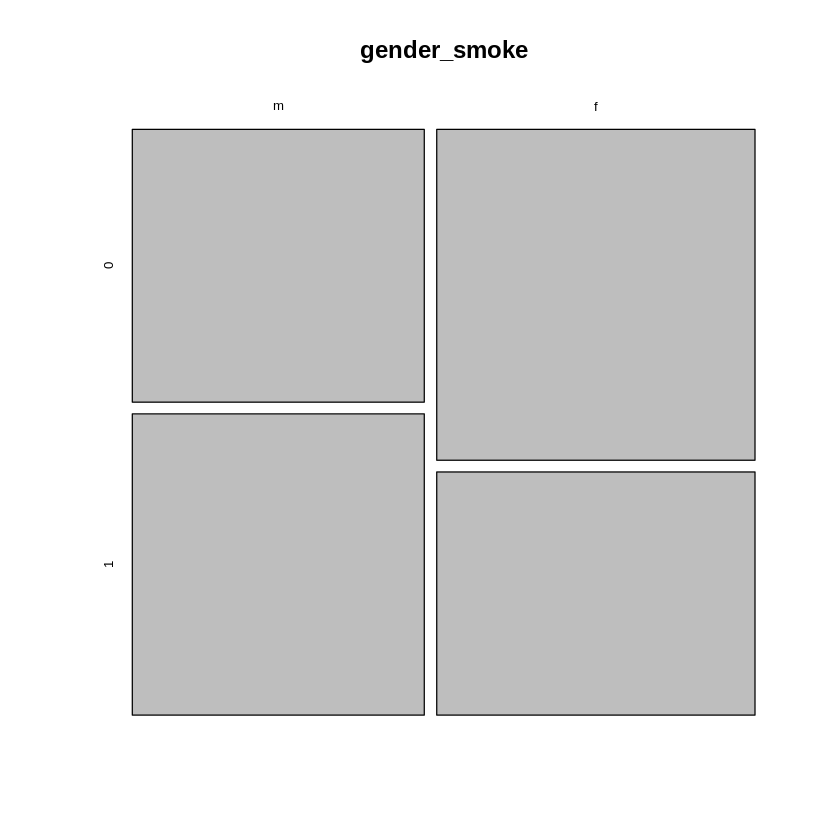

In [16]:
mosaicplot(gender_smoke) #  column labels: 0 and 1. 1 indicates a respondent has smoked at least 100 cigarettes.

**Answer**: It seems that men smoke more often than women.